In [10]:
# import the modules and function you will use here
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import ElasticNetCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import seaborn as sns
!pip install mglearn

This problem deals with regularized regression. The boston dataset is described right after it is loaded in just by running the code that is aleardy there.

In [11]:
#Loading in Data
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

$(a)$ Split the data into a train and a test set

In [12]:
#Splitting Test and Training Models
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

$(b)$ Use this data to fit an OLS, LASSO, ridge, and ElasticNet model on the data. For now, use the default for the penalty coefficient. Display the coefficients and test error for each.

In [13]:
#Fiting Model for OLS
lr = LinearRegression().fit(X_train, y_train)
print("OLS Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("OLS Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("OLS.coef_:", lr.coef_)

#Fiting Model for LASSO
lasso = Lasso().fit(X_train, y_train)
print("Lasso Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("lasso.coef_:", lasso.coef_)

#Fitting Model for Ridge
ridge = Ridge().fit(X_train, y_train)
print("Ridge Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("ridge.coef_:", ridge.coef_)

#Fitting Model for ELasticNet
elastic = ElasticNet().fit(X_train, y_train)
print("ElasticNet Training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("ElasticNet Test set score: {:.2f}".format(elastic.score(X_test, y_test)))
print("ElasticNet.coef_:", elastic.coef_)

OLS Training set score: 0.75
OLS Test set score: 0.68
OLS.coef_: [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Lasso Training set score: 0.69
Lasso Test set score: 0.65
lasso.coef_: [-0.0838981   0.02646051 -0.          0.         -0.          1.54544951
  0.01345772 -0.58282853  0.20738089 -0.01121302 -0.70500625  0.01198848
 -0.75783702]
Ridge Training set score: 0.75
Ridge Test set score: 0.68
ridge.coef_: [-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]
ElasticNet Training set score: 0.69
ElasticNet Test set score: 0.66
ElasticNet.coef_: [-0.10270885  0.03414157 -0.00689058  0.         -0.          1.14428334
  0.01442808 -0.70930241  0.26472536 -0.01347162 -0.74428292  0.01200929
 -0.78282769]


$(c)$ Describe the differences that you see in the coefficients and error. What is the cause of this difference in coefficients?

In [14]:
#for the error OLS and Ridge seem to do better as far as the test set goes, this could be because lasso is getting rid of 
#observations that are helpful as well as ElasticNet.  Lasso has smaller coefficients because it gets rid of the observations
#that are further out from the regression line.  OLS and Ridge are more similar with their coefficients.  The cause in 
#difference of the coefficients is because of the penalized regressions getting rid of the more varied observations

$(d)$ Use K-fold cross validation to find an optimal penalty parameter for Ridge and Lasso.

In [15]:
#Lasso
alpha_grid = {'alpha': [.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02 ],'max_iter': [100000]}
grid_search = GridSearchCV(Lasso(),alpha_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(X_train,y_train)
print("Best alpha Lasso: ",best_model.best_estimator_.get_params()['alpha'])
#Ridge
alpha_grid = {'alpha': [.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02 ],'max_iter': [100000]}
grid_search = GridSearchCV(Ridge(),alpha_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(X_train,y_train)
print("Best alpha Ridge: ",best_model.best_estimator_.get_params()['alpha'])


Best alpha Lasso:  0.002
Best alpha Ridge:  0.002


$(e)$ Now use cross validation, to find the optimal penalty parameter. Use LOOCV and Kfold cross validation with K=5 to find optimal parameters for the ElasticNet model. How do the test errors and optimal parameters differ?

In [16]:
kfold = KFold(n_splits=5, random_state=42)
results = cross_val_score(elastic, X_train, y_train, cv=kfold)
print("Accuracy: %.3f%%" % (results.mean()*100.0))

loocv = LeaveOneOut()
net = ElasticNet()
loocv.get_n_splits(x)
LOOCV = LeaveOneOut()
LOOCV.get_n_splits(x)
grid_search = GridSearchCV(net, {'alpha': [.001, .0001, .01, .1]}, cv=LOOCV)
best_model = grid_search.fit(X_train, y_train)
print('Best Model:', best_model.best_estimator_.get_params()['alpha'])
print('Test Set Score:', grid_search.score(X_test, y_test))

Accuracy: 66.587%
Best Model: 0.001
Test Set Score: 0.6831635181970843


$(f)$ Now that we have tuned the models to perform about as well as they can, which one performs best on the training data? Which one performs best on the test data? Which of these models allow us to do effective causal inference with the coefficients? Why?

In [17]:
#Optimal Alpha for K folds was .06 and the score was 66%

For the next problem we will be using the `Carseats` data set that is available on learningsuite. Load the data and convert the text variables into dummies so that we can use them in the data. Pandas has a function called `get_dummies` that you might want to use.

In [18]:
df = pd.read_csv('Carseats.csv')
df=pd.get_dummies(df, columns=None)


Now that the data has only numeric columns, we can proceed to the analysis.  
Use `Sales` as the outcome variable  
(a) Split the data set into a training set and a test set.  
(b) Fit a regression tree to the training set with the default depth. What train and test MSE do you obtain?  
(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE? Plot a tree with a depth of 3, and interpret the results.  
(d) Use a bagging approach in order to analyze this data. What test MSE do you obtain? Look at the feature importances attribute of your model object to determine which variables are most important.  
(e) Use random forests to analyze this data. What test MSE do you obtain? Look at the feature importances attribute of your model object function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

{'max_depth': 3}
Train MSE: 5.402986333333334
Test MSE: 0.0
Train MSE: 3.890424572055476
Test MSE: 4.379462200111181


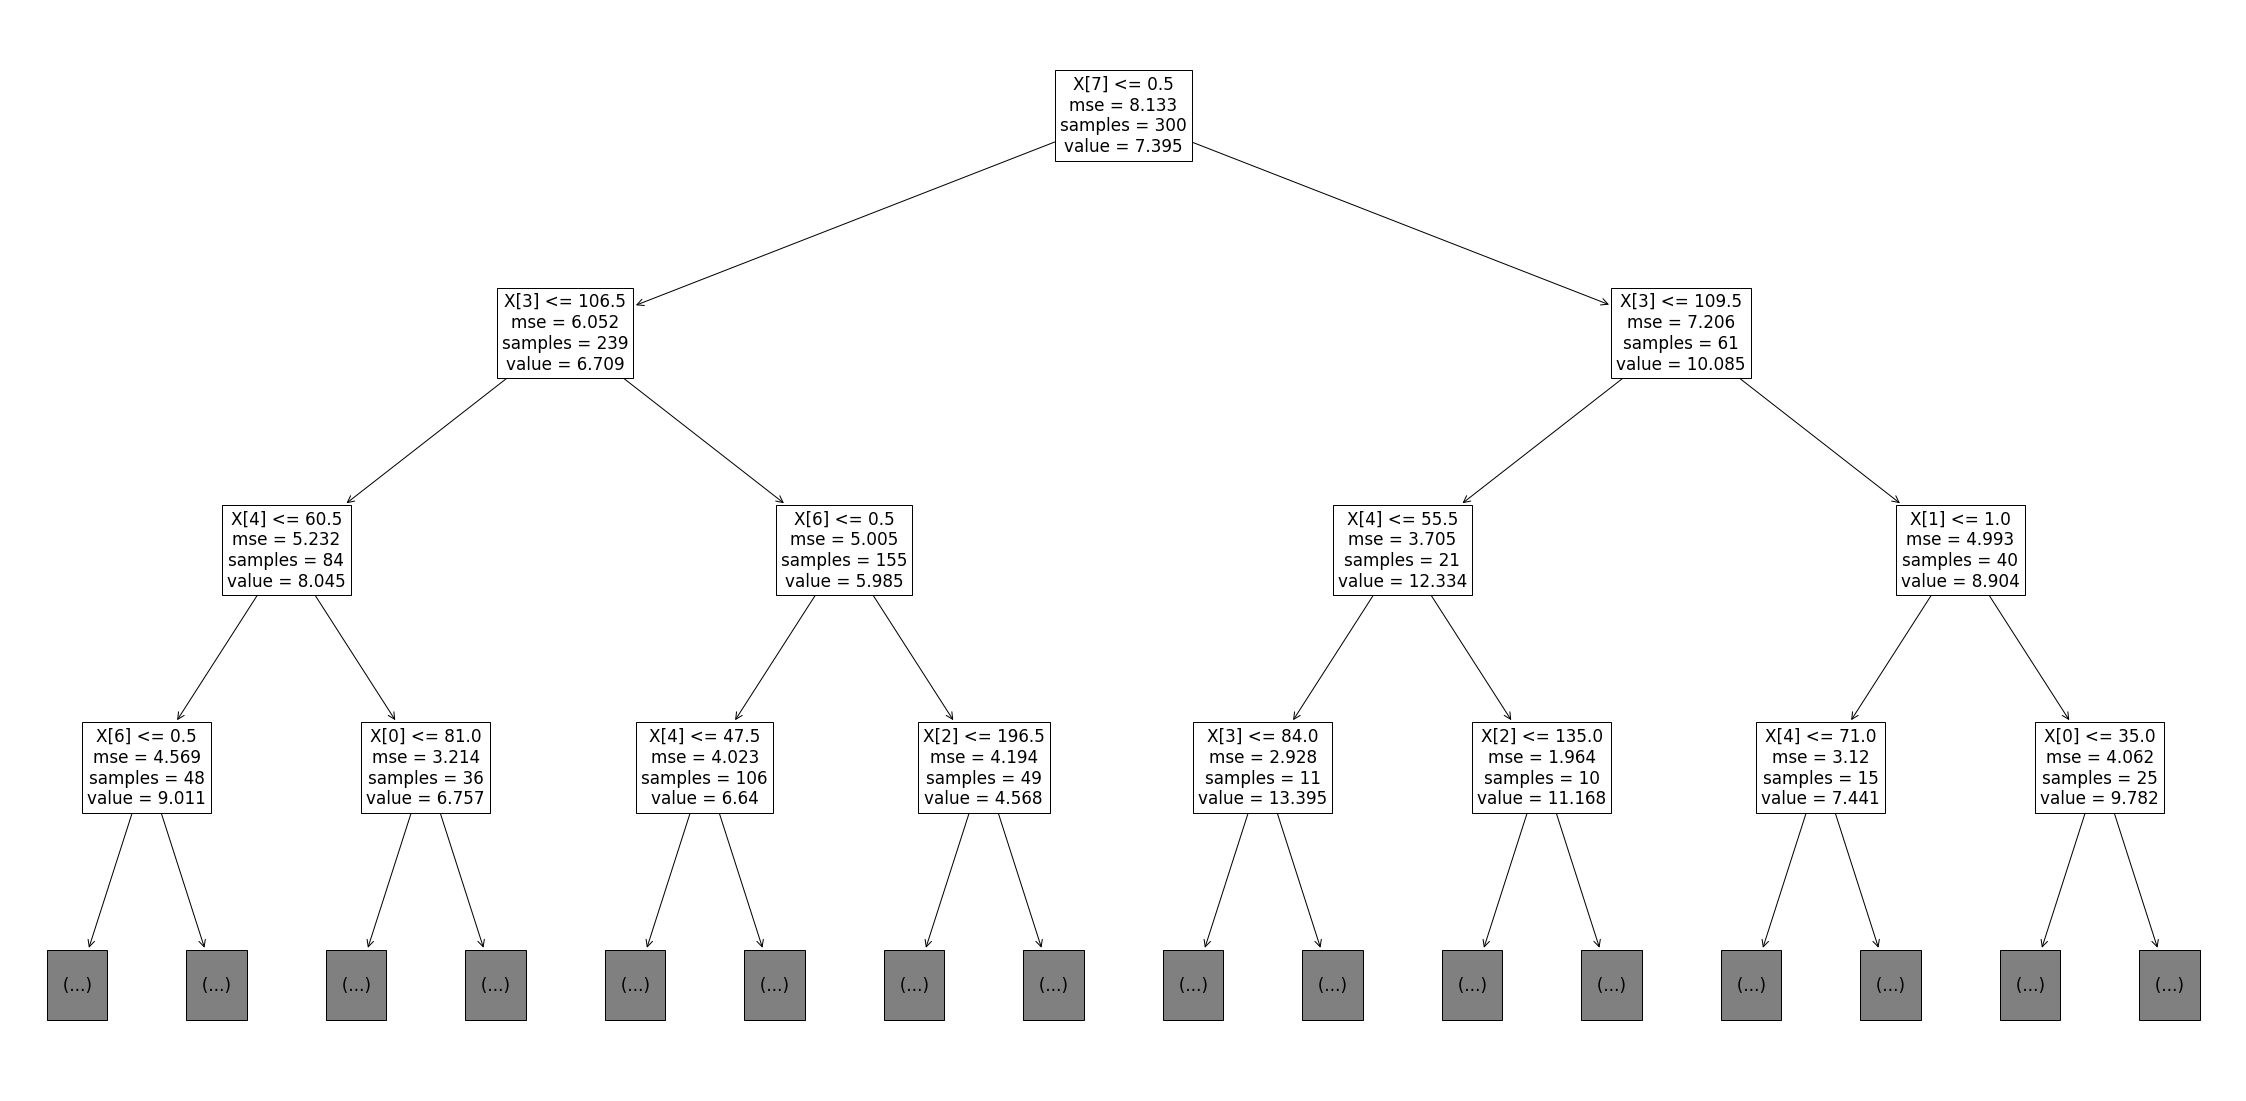

ValueError: Unknown label type: 'continuous'

In [19]:
y = df[['Sales']]
x = df[df.columns[3::]]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
c = DecisionTreeRegressor(random_state=0)
c = c.fit(X_train, y_train)
c.fit(X_test, y_test)

param_grid = {'max_depth': np.arange(1, 10)}
d = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid)
d.fit(X_train, y_train)
print(d.best_params_)

train_predictions = c.predict(X_train)
test_predictions = c.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

train_predictions = d.predict(X_train)
test_predictions = d.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(40, 20))
tree.plot_tree(clf, max_depth=3, ax=ax)
plt.show()

param_grid = {'C':[.5,1,2],
              'kernel':['rbf','linear','sigmoid']}

gs = GridSearchCV(SVC(), param_grid, cv=5, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
y_hat = gs.predict(X_test)
print(mse(y_hat, y_test))

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


We will now use boosting to predict Log Salary in the `Hitters` data set.  
(a) Format the data appropriately for this analysis. Use 200 observations in your training set.  
(b) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis. Add a curve with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis. The shrinkage parameter is often referred to as the learning rate   
(c) Compare the test MSE of boosting to the test MSE of two of the penalized regression approaches that we discussed  
(d) Which variables appear to be the most important predictors in the boosted model?  
(e) The default for base estimator is a Decision Tree with a maximum depth of 3. Is that the optimal depth? Justify your response.  
(f) Now that the boosting model is tuned, let's compare the results to bagging and random forests. Report test errors for your models and discuss how they compare.

In [20]:
df = pd.read_csv('Hitters.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.  

#### NOTE: SVM algortihms will often take longer than other models to train, particularly when doing cross validation

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.  
(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.  
(c) Make an ROC curve for your model. The module scikitplot has a nice function you might want to use but you should eb able to make it on your own or another module if you desire.

In [21]:
df= pd.read_csv('Auto.csv')
x = np.median(df.mpg)
mpg_indicator = []

for i in range(len(df.mpg)):
    if df.mpg[i] <x:
        mpg_indicator.append(0)
    else:
        mpg_indicator.append(1)
df["mpg_indicator"] = mpg_indicator
df.head()

y = df[['mpg_indicator']]
x = df[df.columns[0:8]]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

svc = SVC(C=1000)
svc.fit(X_train, y_train)

svc = SVC(C=100)
svc.fit(X_train, y_train)

svc = SVC(C=10)
svc.fit(X_train, y_train)

ValueError: could not convert string to float: '?'

Below there are some generated datasets of varying structure that you will classifying is SVMs, plotting the data to see what it looks like will likey be helpful. Find the basis kernel that does best job classifying each of them. Because the data is two dimensional, it might be nice to use a library like mlxtend which has a function that will display decision regions form an svm using a one of their functions.

NameError: name 'x_train' is not defined

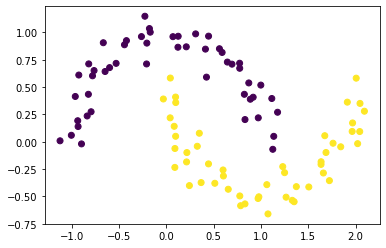

In [22]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, shuffle=True, noise=1/10, random_state=123)

plt.scatter(x[:,0], x[:,1], c=y)

mse = mean_squared_error 

param_grid = {'C':[.5,1,2],
              'kernel':['rbf','linear','sigmoid']}

gs = GridSearchCV(SVC(), param_grid, cv=5, scoring='neg_mean_squared_error')
gs.fit(x_train, y_train)
print(gs.best_params_)
y_hat = gs.predict(x_test)
print(mse(y_hat, y_test))

{'C': 1, 'kernel': 'rbf'}
0.0


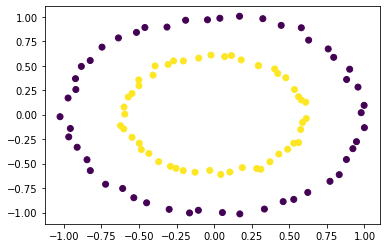

In [23]:
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=100, shuffle=False, noise=1/50, random_state=123, factor=0.6)

plt.scatter(x[:,0], x[:,1], c=y)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

param_grid = {'C':[.5,1,2],
              'kernel':['rbf','linear','sigmoid']}

gs = GridSearchCV(SVC(), param_grid, cv=5, scoring='neg_mean_squared_error')
gs.fit(x_train, y_train)
print(gs.best_params_)
y_hat = gs.predict(x_test)
print(mse(y_hat, y_test))